In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:08<00:00, 190MB/s]
100% 812M/812M [00:08<00:00, 103MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
   zip.extractall()
   print('The dataset is extracted')

The dataset is extracted


In [7]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
   zip.extractall()
   print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


In [9]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.10539.jpg', 'dog.7862.jpg', 'cat.9293.jpg', 'dog.12068.jpg', 'cat.7482.jpg', 'dog.2928.jpg', 'dog.2983.jpg', 'dog.6246.jpg', 'dog.11298.jpg', 'cat.2090.jpg', 'dog.3696.jpg', 'cat.4849.jpg', 'dog.7034.jpg', 'cat.3405.jpg', 'cat.8036.jpg', 'cat.7742.jpg', 'cat.10981.jpg', 'dog.7517.jpg', 'dog.5048.jpg', 'dog.10749.jpg', 'cat.2369.jpg', 'dog.3469.jpg', 'dog.1969.jpg', 'dog.9486.jpg', 'dog.6430.jpg', 'cat.6918.jpg', 'dog.8697.jpg', 'dog.4863.jpg', 'cat.11977.jpg', 'cat.5662.jpg', 'cat.10181.jpg', 'dog.4817.jpg', 'cat.9578.jpg', 'dog.9182.jpg', 'cat.3656.jpg', 'dog.11302.jpg', 'cat.5882.jpg', 'dog.1826.jpg', 'cat.2447.jpg', 'dog.11700.jpg', 'cat.4449.jpg', 'cat.7759.jpg', 'cat.5558.jpg', 'dog.6810.jpg', 'cat.2956.jpg', 'cat.3326.jpg', 'dog.8266.jpg', 'dog.685.jpg', 'cat.9537.jpg', 'cat.9153.jpg', 'cat.7469.jpg', 'dog.7679.jpg', 'dog.5389.jpg', 'cat.8172.jpg', 'cat.9414.jpg', 'cat.8703.jpg', 'cat.7370.jpg', 'cat.6657.jpg', 'cat.7592.jpg', 'cat.2050.jpg', 'cat.9801.jpg', 'cat.11417.jpg'

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

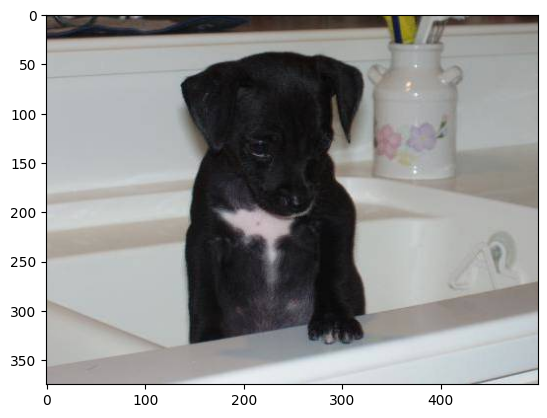

In [13]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Nimbrt of cat images = ', cat_count)

Number of dog images = 12500
Nimbrt of cat images =  12500


In [16]:
os.mkdir('/content/image resized')

In [20]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

In [22]:
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [23]:
print(labels)

[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 

In [24]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1001  999]


In [25]:
import cv2
import glob

In [34]:
image_directory = '/content/image resized/'
image_extention = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extention]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [35]:
X = dog_cat_images
Y = np.asarray(labels)

In [36]:
print(X)
print(Y.shape)

[[[[153 168 224]
   [153 168 224]
   [154 169 225]
   ...
   [146 159 205]
   [146 159 205]
   [145 158 204]]

  [[153 168 224]
   [153 168 224]
   [153 168 224]
   ...
   [146 159 205]
   [146 159 205]
   [145 158 204]]

  [[153 168 224]
   [153 168 224]
   [153 168 224]
   ...
   [147 160 206]
   [146 159 205]
   [146 159 205]]

  ...

  [[120 127 146]
   [121 128 147]
   [120 129 149]
   ...
   [161 160 176]
   [160 159 175]
   [159 158 174]]

  [[125 132 152]
   [126 133 153]
   [125 132 152]
   ...
   [156 155 171]
   [155 154 170]
   [154 153 169]]

  [[127 134 154]
   [128 135 155]
   [127 134 154]
   ...
   [152 151 167]
   [151 150 166]
   [151 150 166]]]


 [[[177 164 148]
   [177 164 148]
   [178 165 149]
   ...
   [216 205 191]
   [216 205 191]
   [216 205 191]]

  [[177 164 148]
   [178 165 149]
   [181 168 152]
   ...
   [217 206 192]
   [216 205 191]
   [216 205 191]]

  [[178 165 149]
   [180 167 151]
   [184 171 155]
   ...
   [218 207 193]
   [217 206 192]
   [217 206

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [38]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [39]:
import tensorflow as tf
import tensorflow_hub as hub

In [40]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224,3), trainable = False)

In [41]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [43]:
model.compile(

              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['acc']
)

In [44]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 67s 1s/step - loss: 0.1806 - acc: 0.9275
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0550 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0367 - acc: 0.9906
Epoch 4/5
50/50 [==============================] - 61s 1s/step - loss: 0.0268 - acc: 0.9944
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0209 - acc: 0.9962


In [45]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 20s 1s/step - loss: 0.0333 - acc: 0.9850
Test Loss =  0.033328622579574585
Test Accuracy =  0.9850000143051147


Path of the image to be predicted: /content/download.jfif


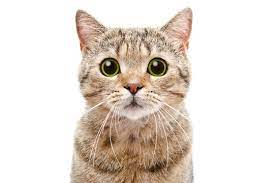

1/1 [==============================] - 0s 55ms/step
The image represents a Cat 


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize / 255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat ')

else:
  print('The image represents a Dog')